In [5]:
import csv

def writeToCSV(file, y):
    csvFile = open(file, 'w')
    csvWriter = csv.writer(csvFile)

    header = ['y']
    csvWriter.writerow(header)

    for i, target in enumerate(y):
        csvWriter.writerow([target])
        
    csvFile.close()

In [6]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow_datasets as tfds
import librosa
from urllib.parse import urljoin

directory = os.getcwd()
print(directory)

data = pd.read_csv("./archive/sanitised_data.csv")

print(data.head())

data["Wav_path"] = data["Wav_path"].apply(lambda x: urljoin(directory,x))


def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            # load all audio files as a floating point time series (amplitude over time)
            # returns audio time series (x) and sampling rate (sr)
            x , sr = librosa.load(record['Wav_path'])
            
            # this extracts the first 128 Mel-frequency cepstral coefficients (MFCCs)
            # MFCC is a scale that relates the perceived frequency of a tone to the actual measured frequency
            # it scales the frequency in order to match more closely what the human ear can hear
            # results in 128 coefficients which are the weights given to the cepstral classifiers
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['Is_dysarthria']

    return dataf

dataf = feature_extraction(data)
dataf.to_csv("v1_coeffs.csv", index = False, mode = "w", header = True)

c:\Users\wonuo\OneDrive\Documents\Year 3\Final Project\Personal\individual-final-year-project\voice
   Gender Is_dysarthria                                           Wav_path  \
0  Female            No  archive/Female_Non_Dysarthria/FC01/Session1/Wa...   
1  Female            No  archive/Female_Non_Dysarthria/FC01/Session1/Wa...   
2  Female            No  archive/Female_Non_Dysarthria/FC01/Session1/Wa...   
3  Female            No  archive/Female_Non_Dysarthria/FC01/Session1/Wa...   
4  Female            No  archive/Female_Non_Dysarthria/FC01/Session1/Wa...   

                                            Txt_path  \
0  archive/Female_Non_Dysarthria/FC01/Session1/Tx...   
1  archive/Female_Non_Dysarthria/FC01/Session1/Tx...   
2  archive/Female_Non_Dysarthria/FC01/Session1/Tx...   
3  archive/Female_Non_Dysarthria/FC01/Session1/Tx...   
4  archive/Female_Non_Dysarthria/FC01/Session1/Tx...   

                                     Prompts  
0                [say 'Ah-P-Eee' repeatedly]  


 19%|█▉        | 836/4316 [00:26<01:06, 51.98it/s]C:\Users\wonuo\AppData\Local\Temp\ipykernel_40832\3260702042.py:30: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(record['Wav_path'])
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 98%|█████████▊| 4223/4316 [01:44<00:02, 41.01it/s]C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
 98%|█████████▊| 4248/4316 [01:45<00:01, 39.60it/s]C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFou

In [7]:
dataf

0           1          2          3          4          5  \
0    -250.880539  119.133636 -12.324249  50.176880  -8.731255  20.669249   
1    -229.644043  131.868332 -15.585507  45.116741  -5.850152  20.454689   
2    -341.561401  134.222336 -44.668255  76.373795 -45.277668  48.595371   
3    -227.943756  136.752213  -8.549256  46.057274  -4.130186  26.301699   
4    -290.497406  113.228096 -20.367878  43.941975 -19.119982  31.545454   
...          ...         ...        ...        ...        ...        ...   
4309 -398.074554   83.627602  -2.136158  20.663471   9.002775  10.630280   
4310 -385.192871  106.332565  -5.064662  28.304255   6.060897  11.366142   
4311 -424.956238   92.837914  -2.744657  32.655392   1.271964  15.897974   
4312 -405.848541   90.441406  -4.557594  39.873806   9.432891  26.169315   
4313 -381.564087  100.035522  -3.498142  38.500885  11.284783  19.730207   

              6          7         8         9  ...       119       120  \
0    -10.247526  23.291002 -3.516492 -4.896182  ...  1.047390  1.271261   
1    -14.253201  21.516705 -0.932840 -5.912992  ...  0.437333  0.585463   
2    -20.282362  37.061932  3.272867  8.899017  ...  2.128030  1.663369   
3     -5.970822  20.889896 -0.831987 -1.308950  ...  0.814151  0.507424   
4     -6.135892  21.024363  5.153450  3.578236  ...  1.449304  1.546894   
...         ...        ...       ...       ...  ...       ...       ...   
4309  -1.120443   6.161469 -2.217765 -1.448509  ...  0.259055  0.004362   
4310  -9.927261   4.629142 -3.442832 -7.270000  ...  0.527828  0.437878   
4311  -4.645046   4.229576  3.076774 -1.996650  ...  0.826392  0.258143   
4312 -12.449636   5.401501  3.207411 -5.046667  ...  0.139545  0.390979   
4313 -12.511644   9.483696 -1.425360 -9.129395  ...  0.489815  0.022003   

           121       122       123       124       125       126       127  \
0     0.307013  0.305903 -0.336142  0.335104  0.000711 -0.558401 -0.711826   
1    -0.320256 -0.078058 -0.396943  0.086677  0.012037 -0.355436 -0.472992   
2     1.726814 -0.544298  0.594133 -0.563524  0.921909 -1.207411 -0.398201   
3    -0.387803  0.013117 -0.520789  0.183008  0.022190 -0.565088 -0.109329   
4     0.844728  0.616075 -0.127843  0.703422  0.167123  0.075641 -0.079784   
...        ...       ...       ...       ...       ...       ...       ...   
4309  0.042385  0.261825  0.110124  0.299985  0.093776 -0.034124 -0.352141   
4310 -0.052442 -0.061408  0.250993  0.160797 -0.067156  0.017922  0.007736   
4311  0.005850  0.588675  0.171647  0.417133 -0.021403 -0.055495  0.024629   
4312  0.117414  0.244264  0.082272  0.247920  0.141719  0.164090  0.052014   
4313 -0.219398  0.147546  0.049997  0.229425 -0.134397  0.070685 -0.093500   

      class  
0        No  
1        No  
2        No  
3        No  
4        No  
...     ...  
4309    Yes  
4310    Yes  
4311    Yes  
4312    Yes  
4313    Yes  

[4314 rows x 129 columns]

In [8]:

dataf.loc[dataf['class']=='No','class'] = 0.0
dataf.loc[dataf['class']=='Yes','class'] = 1.0

dataf['class'] = dataf['class'].astype(float)

X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1]

In [9]:
X.shape, y.shape

((4314, 128), (4314,))

In [10]:
# split the targets and data into a training set and test set 
training_data, testing_data, training_targets, testing_targets = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(training_data, training_targets, test_size=0.1, random_state=1, stratify=training_targets)

X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score


In [12]:
# construct a multi layer convolutional neural network
model = Sequential([
    # passive input layer, may or may not be weighted, input shape matches the shape of data and targets
    # input is given as array / tensor of 3 dimensions with 16 elements in the first dimension, 8 in the second and 1 in the third
    InputLayer(input_shape=(16, 8, 1)),
    # 2d convolutional layer with 32 output filters using the rectified linear unit activation function
    # the output has the same size as the input due to same padding and stride of 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    # downsamples the input by taking the maximum value over a 2*2 input window for each channel of the input
    # reduces the size of the audio
    MaxPooling2D(2, 2),
    # 2d convolutional layer with 64 output filters using the rectified linear unit activation function
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    # downsamples the input by taking the maximum value over a 2*2 input window for each channel of the input
    MaxPooling2D(2, 2),
    # flattens the input from a 3d  4 * 2 * 64 array into a sequential 512 array
    # cannot pass multidimensional array into a dense layer
    Flatten(),
    # densely connected neural network layer with an output dimensionalty of 32
    # classifies based on output from convolutional layers
    Dense(32, activation='relu'),
    # densely connected neural network layer with an output dimensionalty of 1.
    # the output neuron will contain a value from 0-1 where 0 for 1 class ('No dysarthria') and 1 for the other ('Dysarthria')
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [13]:
# configure the model for training using anoptimizer that uses the Adam algorithm
# the models accuracy is evaluated during training and testing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_name = "model.h5"
# monitors the model's total loss and save the model considered the "best" 
# the "best" model is determined by minimizing the total loss  
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

# stop training the model when the model's total loss is improved on by any value > 0
# if no improvement occurs after 5 epochs then training will be stopped
# restores the model weights from the epoch with the best value
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [15]:
# fit the model to the training data using 50 iterations and use the testing data to validate it 
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
107/110 [============================>.] - ETA: 0s - loss: 0.5696 - accuracy: 0.7707
Epoch 1: val_loss improved from inf to 0.29296, saving model to model.h5
110/110 [==============================] - 2s 10ms/step - loss: 0.5652 - accuracy: 0.7733 - val_loss: 0.2930 - val_accuracy: 0.9100
Epoch 2/50
107/110 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.9203
Epoch 2: val_loss improved from 0.29296 to 0.13686, saving model to model.h5
110/110 [==============================] - 1s 9ms/step - loss: 0.2207 - accuracy: 0.9204 - val_loss: 0.1369 - val_accuracy: 0.9614
Epoch 3/50
105/110 [===========================>..] - ETA: 0s - loss: 0.1164 - accuracy: 0.9649
Epoch 3: val_loss improved from 0.13686 to 0.08352, saving model to model.h5
110/110 [==============================] - 1s 8ms/step - loss: 0.1165 - accuracy: 0.9654 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 4/50
104/110 [===========================>..] - ETA: 0s - loss: 0.0751 - accuracy: 0.

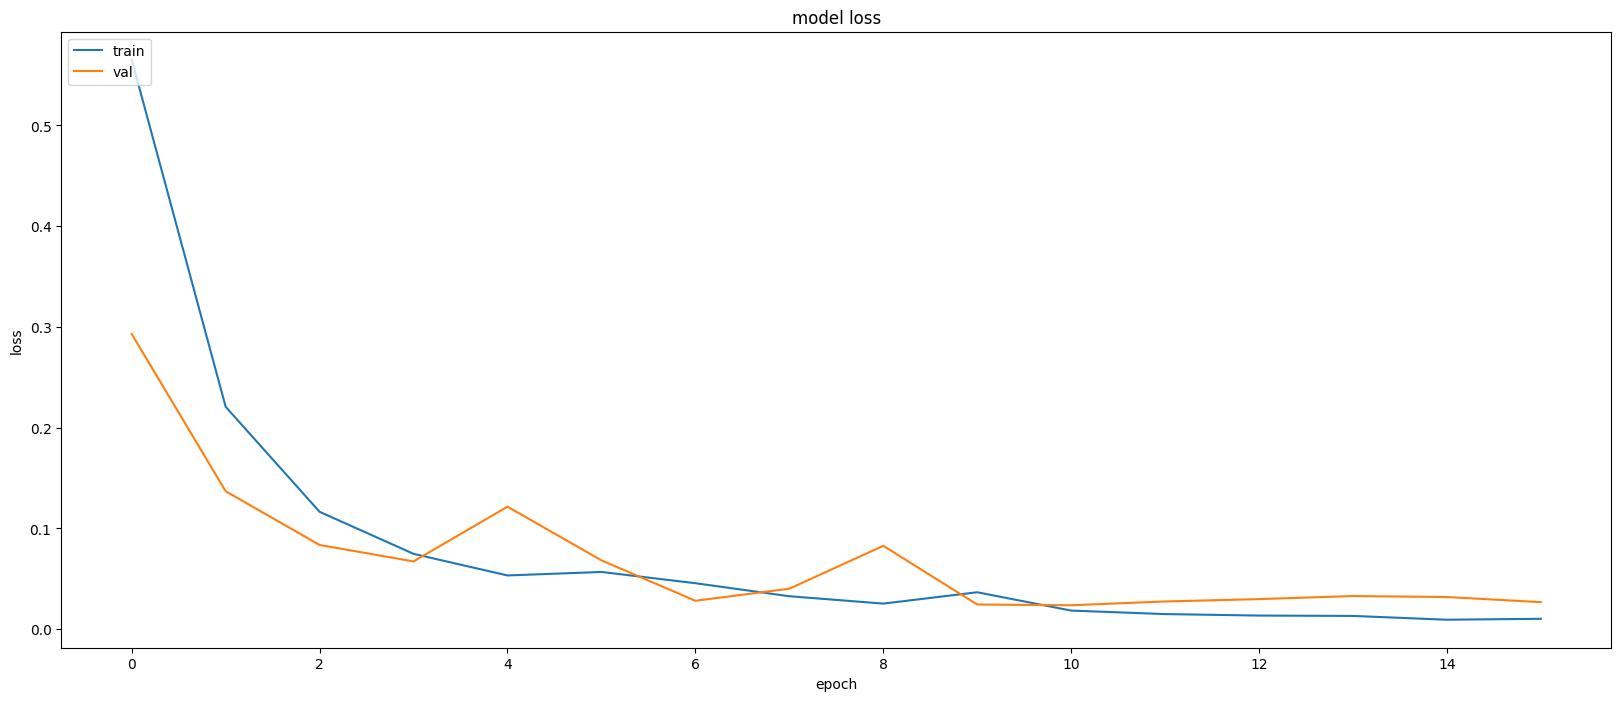

In [16]:
plt.figure(figsize=(20,8))
# loss is the value of cost function for the training data
plt.plot(history.history['loss'])
#val_loss is the value of cost function for the validation data
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [19]:
print(y_test)


1426    1.0
771     0.0
3575    0.0
1470    1.0
1929    0.0
       ... 
1928    0.0
1091    1.0
2192    0.0
2206    0.0
1345    1.0
Name: class, Length: 389, dtype: float64


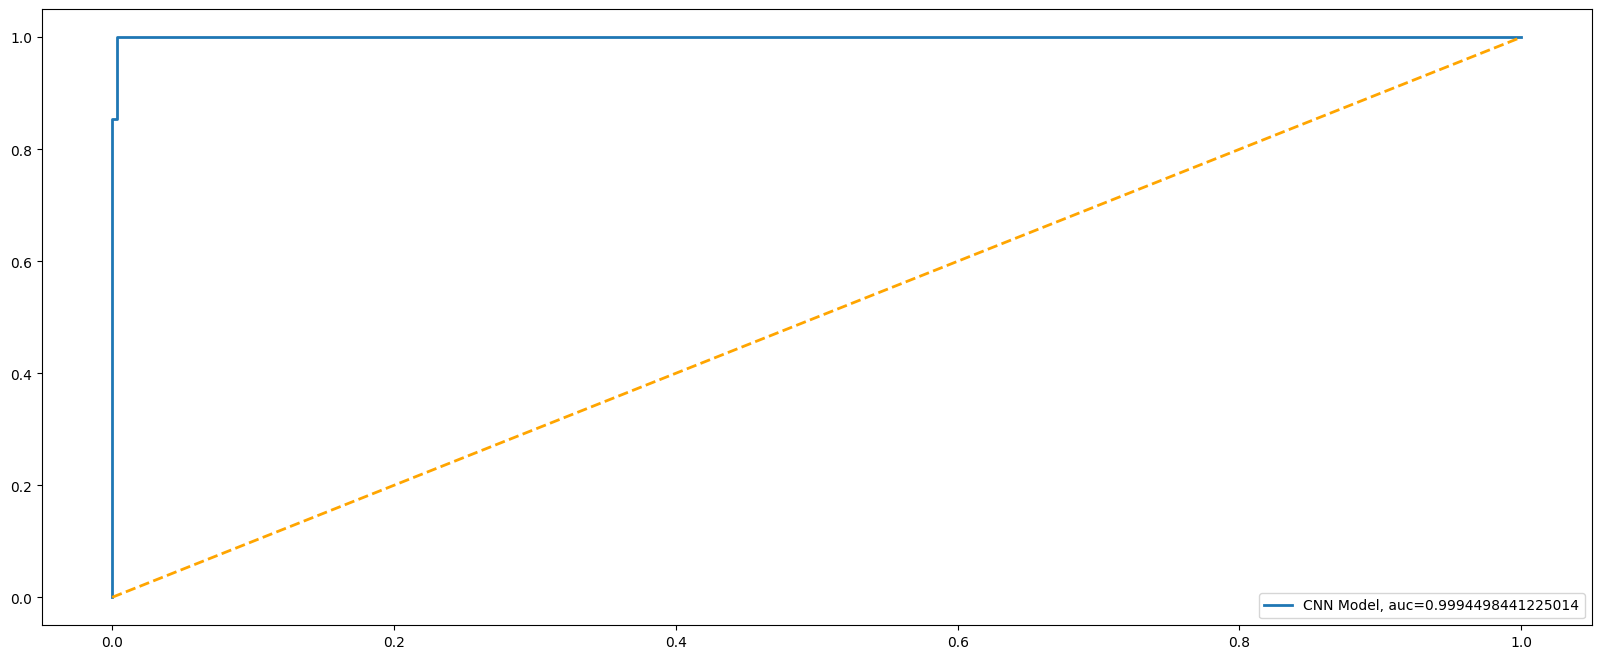

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [21]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

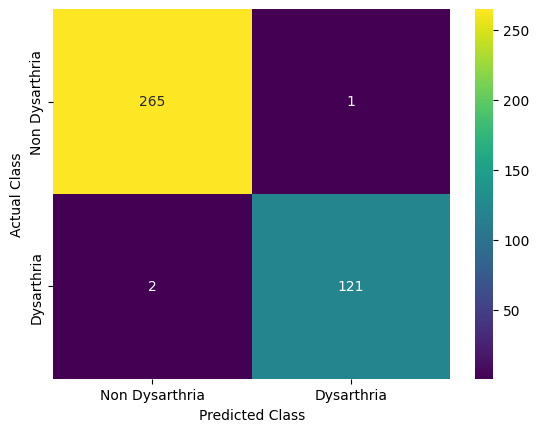

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       266
         1.0       0.99      0.98      0.99       123

    accuracy                           0.99       389
   macro avg       0.99      0.99      0.99       389
weighted avg       0.99      0.99      0.99       389



In [24]:
print("Recall Score of the Model: ",recall_score(y_test,y_pred))

Recall Score of the Model:  0.983739837398374


In [27]:
model.save('voice_model')

INFO:tensorflow:Assets written to: voice_model\assets


INFO:tensorflow:Assets written to: voice_model\assets
